## Regressão binária

In [62]:
import numpy as np
import matplotlib.pyplot as plt

In [63]:
class BinaryLogisticalRegression:
    
    # Construtor
    def __init__(self, x, y, addOnes = True):
        if addOnes:
            self.x = np.c_[np.ones(x.shape[0]), x]
        else:
            self.x = x
        self.y = y
        self.w = np.zeros(self.x.shape[1]).reshape(-1,1)
        self.MSE = 0.0
    
    # Getters
    def getX(self):
        return self.x
    
    def getY(self):
        return self.y
    
    def getW(self):
        return self.w
    
    def getMSE(self):
        return self.MSE
    
    # Setters
    def setX(self, x, addOnes = True):
        if addOnes:
            x = np.c_[np.ones(x.shape[0]), x]
        self.x = x
        self.w = np.zeros(self.x.shape[1]).reshape(-1,1)
    
    def setY(self, y):
        self.y = y
    
    # Métodos
    def sigmoid(self, x):
        return 1/(1 + np.exp(-x))
    
    def trainGD(self, alpha = 0.1, max_iterations = 100):
    
        n = len(self.y)
        yhat = np.zeros(n).reshape(-1,1)
        e = np.zeros(n).reshape(-1,1)
                 
        for t in range(max_iterations):
            yhat = self.sigmoid(self.x @ self.w)
            e = self.y - yhat
            self.w[0] = self.w[0] + (alpha/n * e.sum())
            for column in range(1, len(self.w)):
                self.w[column] = self.w[column] + alpha/n * ((e * self.x[:,[column]]).sum())
                    
        self.MSE = ((e ** 2).sum())/(2*n)
    
    def test(self):
        return self.y - (self.x @ self.w)
    
    def predict(self, x, addOnes = True):
        if addOnes:
            x = np.c_[np.ones(x.shape[0]), x]
        return np.sign(x @ self.w)

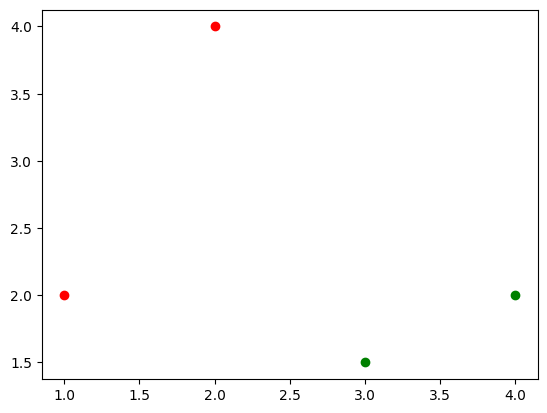

In [65]:
x = np.array([[1,   2], 
              [2,   4], 
              [3, 1.5], 
              [4,   2]])

y = np.array([0, 0, 1, 1]).reshape(-1,1)

regression = BinaryLogisticalRegression(x, y)
regression.trainGD(max_iterations = 100)
regression.test()
ypredict = regression.predict(x)



for i in range(x.shape[0]):
    if ypredict[i] == -1:
        plt.plot(x[i,0], x[i,1], 'ro')
    else:
        plt.plot(x[i,0], x[i,1], 'go')
plt.show()

## Classificação multiclasse

In [2]:
# Untested
class MulticlassLogisticalRegression:
    
    # Construtor
    def __init__(self, x, y, addOnes = True):
        if addOnes:
            self.x = np.c_[np.ones(x.shape[0]), x]
        else:
            self.x = x
        self.y = y
        self.w = np.zeros((self.x.shape[1], y.shape[1]))
        self.MSE = 0.0
    
    # Getters
    def getX(self):
        return self.x
    
    def getY(self):
        return self.y
    
    def getW(self):
        return self.w
    
    def getMSE(self):
        return self.MSE
    
    # Setters
    def setXY(self, x, y, addOnes = True):
        if addOnes:
            x = np.c_[np.ones(x.shape[0]), x]
        self.x = x
        self.y = y
        self.w = np.zeros((self.x.shape[1], y.shape[1]))
    
    # Métodos
    def softmax(self, w, x, clss):
        return np.exp(x @ w[:,clss])/(np.exp(x @ w).sum())
    
    def trainGD(self, alpha = 0.1, max_iterations = 100):
    
        yhat = np.zeros(self.y.shape)
        e = np.zeros(self.y.shape)
                 
        for t in range(max_iterations):
            for clss in range(w.shape[1]):
                yhat[:, clss] = self.softmax(w, x, clss)
            e = self.y - yhat
            self.w[0, :] = self.w[0, :] + (alpha/n * e.sum())
            for column in range(1, len(self.w)):
                self.w[column, :] = self.w[column, :] + alpha/n * ((e * self.x[:,[column]]).sum())
                    
        self.MSE = ((e ** 2).sum())/(2*n)
    
    def test(self):
        return self.y - (self.x @ self.w)
    
    def predict(self, x, addOnes = True):
        if addOnes:
            x = np.c_[np.ones(x.shape[0]), x]
        return np.sign(x @ self.w)